Dataset shape: (32561, 15)
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   Class  
0          2174             0            

C:\Users\st\AppData\Local\Temp\ipykernel_6388\3306929273.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
C:\Users\st\AppData\Local\Temp\ipykernel_6388\3306929273.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Accuracy: 0.8546
Confusion Matrix:
[[4612  330]
 [ 617  954]]
Precision Score: 0.7429906542056075
Recall Score: 0.6072565245066837
F1 Score: 0.6683012259194396
ROC AUC Score: 0.9065


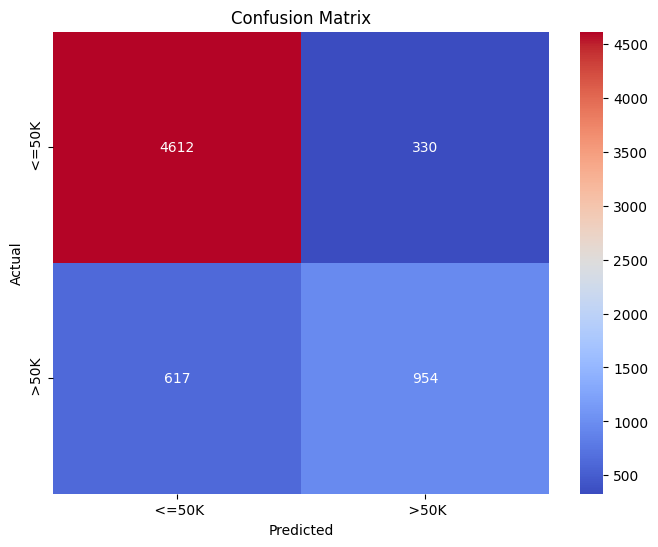

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Parameters from Grid Search: {'C': 0.03162277660168379, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,precision_score,recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt


file_path = r"d:\4th semester\Programming for AI\adult.data"
data = pd.read_csv(file_path, header=None)

# column names
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "Class"
]
data.columns = columns


print(f"Dataset shape: {data.shape}")
print(data.head())

# Handle missing values 
data.replace(' ?', np.nan, inplace=True)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical column
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  
        data[column].fillna(data[column].mean(), inplace=True)

# Features and target separation
X = data.drop('Class', axis=1)
y = data['Class']

# Convert categorical features to numeric using OneHotEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse=False for Logistic Regression
X_encoded = pd.DataFrame(ohe.fit_transform(X[categorical_cols]))
X_encoded.columns = ohe.get_feature_names_out(categorical_cols)

# Drop original categorical columns and concatenate the new encoded features
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)


le = LabelEncoder()
y = le.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Logistic Regression 
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


#  accuracy
accuracy = log_reg.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Precision, Recall, F1 Score
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 5),
    'solver': ['liblinear', 'saga'],  
    'max_iter': [100, 200]  
}

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=3,
    n_jobs=2
)


grid_search.fit(X_train, y_train)


print(f"Best Parameters from Grid Search: {grid_search.best_params_}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,precision_score,recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV




 
param_dist = {
    'penalty': ['l1', 'l2'], 
    'C': np.logspace(-3, 3, 7),  
    'solver': ['liblinear', 'saga'],  
    'max_iter': [100, 200, 300]  
}

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=10,  
    scoring='roc_auc',
    cv=3,
    verbose=3,
    random_state=42,
    n_jobs=2
)


random_search.fit(X_train, y_train)


print(f"Best Parameters from Randomized Search: {random_search.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from Randomized Search: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 200, 'C': 100.0}


C:\Users\st\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
